In [1]:
#%%
from importlib import reload
from datetime import datetime
from vnpy.app.cta_strategy.backtesting import BacktestingEngine

def run_backtesting(
    strategy_class, 
    setting=None,
    vt_symbol="IF88.CFFEX", 
    interval="1m", 
    start=datetime(2019, 5, 1), 
    end=datetime(2019, 10, 1), 
    rate=0.3/10000, 
    slippage=0.2, 
    size=300, 
    pricetick=0.2, 
    capital=1_000_000
):
    engine = BacktestingEngine()
    
    engine.set_parameters(
        vt_symbol=vt_symbol,
        interval=interval,
        start=start,
        end=end,
        rate=rate,
        slippage=slippage,
        size=size,
        pricetick=pricetick,
        capital=capital
    )

    if setting is None:
        setting = {}
    engine.add_strategy(strategy_class, setting)
    
    engine.load_data()
    engine.run_backtesting()
    df = engine.calculate_result()
    engine.calculate_statistics()
    engine.show_chart()
    
    return df

def show_portfolio(df_list):
    portfolio_df = df_list[0]
    for df in df_list[1:]:
        portfolio_df += df
    
    engine = BacktestingEngine()
    engine.calculate_statistics(df)
    engine.show_chart(portfolio_df)

2019-07-22 23:38:01.974533	开始加载历史数据
2019-07-22 23:38:02.424745	加载进度：# [20%]
2019-07-22 23:38:02.962852	加载进度：### [39%]
2019-07-22 23:38:03.238253	加载进度：##### [59%]
2019-07-22 23:38:03.240206	加载进度：####### [78%]
2019-07-22 23:38:03.241183	加载进度：######### [98%]
2019-07-22 23:38:03.243136	加载进度：########## [100%]
2019-07-22 23:38:03.243136	历史数据加载完成，数据量：12000
2019-07-22 23:38:03.442363	策略初始化完成
2019-07-22 23:38:03.443339	开始回放历史数据
2019-07-22 23:38:05.249073	历史数据回放结束
2019-07-22 23:38:05.249073	开始计算逐日盯市盈亏
2019-07-22 23:38:05.256885	逐日盯市盈亏计算完成
2019-07-22 23:38:05.256885	开始计算策略统计指标
2019-07-22 23:38:05.275441	------------------------------
2019-07-22 23:38:05.276417	首个交易日：	2019-05-20
2019-07-22 23:38:05.276417	最后交易日：	2019-07-15
2019-07-22 23:38:05.276417	总交易日：	40
2019-07-22 23:38:05.277394	盈利交易日：	14
2019-07-22 23:38:05.277394	亏损交易日：	26
2019-07-22 23:38:05.277394	起始资金：	1,000,000.00
2019-07-22 23:38:05.277394	结束资金：	208,209.70
2019-07-22 23:38:05.277394	总收益率：	-79.18%
2019-07-22 23:38:05.277394	年化收益：	-475.

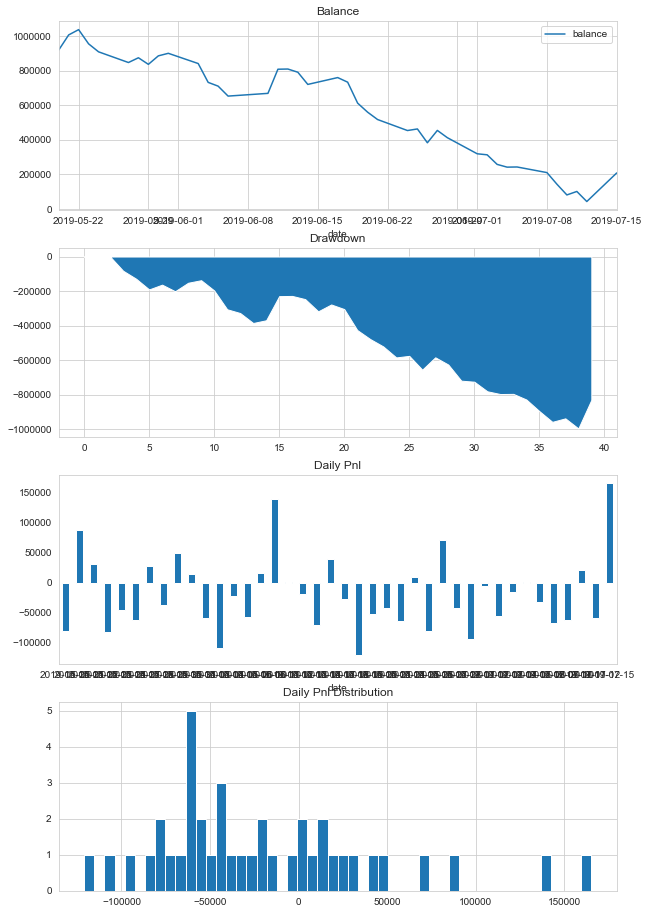

In [2]:
import demo_strategy
reload(demo_strategy)
df5 = run_backtesting(
    demo_strategy.DemoStrategy,
    vt_symbol="IF88.CFFEX"
)